<a href="https://colab.research.google.com/github/krjii/cs506_repo/blob/main/Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: Louisiana Apartments

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Learning Objectives


*   To learn about the Google Colab environment and Python
*   To learn about some Data Science fundamentals
*   To learn about the Cross-industry standard process for data mining (CRISP-DM)



# Google Colab and Python

# Data Science Fundamentals
---
<img src="https://i0.wp.com/www.phdata.io/wp-content/uploads/2022/01/Analytics-Maturity-Graphic-1024x578.png" width=600>

# CRISP -DM

---
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png" width=400>

# Activity
<table>
<tr>
<td>
<h1 style="font-size:20vw"><b>Case Study:</b></h1>
</td>
<td>
<img src="https://noblepawnbroker.com/wp-content/uploads/2019/02/craigslist-logo-transparent.png" width=200>
</td>
</tr>
</table>

**Apartment listings on Craigslist**

https://www.kaggle.com/datasets/austinreese/usa-housing-listings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [ ]:
url1="https://raw.githubusercontent.com/edavgaun/RCEL_506/main/Module%203/Housing%20states/housing_tx_1.csv"
url2="/content/drive/MyDrive/la_apt_listings.csv"

## Business Understanding

<img src="https://www.investopedia.com/thmb/mYJzoXhycAxe-Tp5EiEAhyY2Z4Y=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/the-5-factors-of-a-good-location.aspx_final2-74156b87934741bbbb6190914c0f823c.png" width=400>

In [ ]:
df=pd.read_csv(url2)
df.index=range(len(df))

In [ ]:
df.shape

(7304, 22)

In [ ]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [ ]:
df=df[['region', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long',]]

In [ ]:
df.head(3)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long
0,baton rouge,735,apartment,998,2,2.0,1,1,1,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/01010_dkuk8U2nIl...,Visit Our Community Today!Jefferson Lakes12400...,30.3948,-91.0452
1,baton rouge,855,apartment,840,2,1.0,1,1,1,0,0,0,NaN,NaN,https://images.craigslist.org/00L0L_f9t0f95gie...,SPECIAL: Save big on move-in costs today! Must...,30.4576,-91.1792
2,baton rouge,850,apartment,800,2,1.0,0,0,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/01111_iURPdqG1yH...,Newly remodeled apartments everything new in t...,30.2474,-90.9293


In [ ]:
df.tail(3)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long
7301,shreveport,1191,apartment,1373,2,2.0,1,1,1,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/00J0J_ccjGz8EN4F...,Reflections of Island Park Apartments - show ...,32.4686,-93.6909
7302,shreveport,675,apartment,1080,2,2.0,0,0,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00z0z_461VS96lB9...,Fountain Lakes Apartments 3325 East Texas St B...,32.5449,-93.7038
7303,shreveport,590,apartment,612,1,1.0,1,1,1,0,0,0,laundry on site,NaN,https://images.craigslist.org/00q0q_6ZLZK5ziLi...,Castlewood Apartments Pet Friendly Community i...,32.4020,-93.7908


In [ ]:
df.isna().sum()

region                        0
price                         0
type                          0
sqfeet                        0
beds                          0
baths                         0
cats_allowed                  0
dogs_allowed                  0
smoking_allowed               0
wheelchair_access             0
electric_vehicle_charge       0
comes_furnished               0
laundry_options            1489
parking_options            3159
image_url                     0
description                   0
lat                          13
long                         13
dtype: int64

## Data Understanding (Statistical descriptors and Data Visualization)

In [ ]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,7304.000000,7304.000000,7304.000000,7304.000000,7304.000000,7304.000000,7304.000000,7304.000000,7304.000000,7304.000000,7291.000000,7291.000000
mean,1122.043401,978.502327,1.896495,1.513623,0.731517,0.726588,0.756709,0.097344,0.002464,0.053943,30.611873,-91.535563
std,11180.803278,427.334438,0.849463,0.579783,0.443201,0.445741,0.429099,0.296446,0.049585,0.225921,1.896495,1.902984
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.905600,-147.579000
25%,725.000000,730.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,30.011300,-92.065600
50%,875.000000,950.000000,2.000000,1.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,30.223500,-91.158400
75%,1065.000000,1153.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,30.455400,-90.205200
max,833848.000000,18000.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,-82.288100


In [ ]:
df=df[(df.price>1000) & (df.price<3000) & (df.sqfeet>1000) & (df.sqfeet<4000)]

# Padawan level

<img src="https://static.printler.com/cache/0/8/7/7/4/f/08774fd9dca573c073843879ad260645eff4664d.jpg" width=200>

In [ ]:
# Creating a new column to label all listings as apartment, house or others
df["type2"]=df["type"].apply(lambda x: x if x in ["apartment", "house"] else "others")

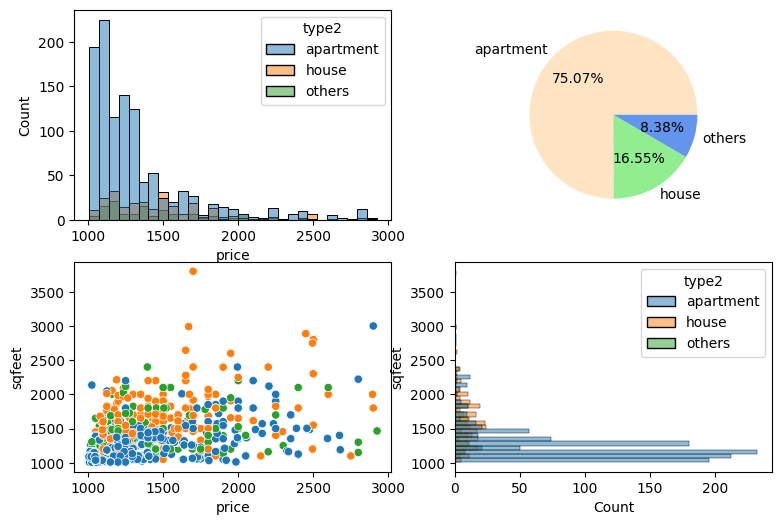

In [ ]:
# Creating a 2 by 2 data visualization matrix.
# This matrix shows the relationship between price and sqfeet. It accounts for the different
# type of listings and it shows how the data is distributed.
color_list=["bisque", "lightgreen", "cornflowerblue",]      # Color list to be used by the pie chart
fig, axs = plt.subplots(2,2, figsize=(9,6))                 # Creating the 2x2 matrix
sns.histplot(data=df, x="price", ax=axs[0,0], hue="type2")  # Creating and placing a histogram for price in the matrix
sns.scatterplot(data=df, x="price", y="sqfeet", hue="type2", ax=axs[1,0])  # Creating and placing a scatterplot
sns.histplot(data=df, y="sqfeet", ax=axs[1,1], hue="type2") # Creating and placing a histogram for sqfeet in the matrix
axs[0,1].pie(df["type2"].value_counts(), autopct="%.2f%%",  # Creating and placing a pie chart for type of listing in the matrix
             labels=df["type2"].value_counts().index,
             colors=color_list)
axs[1,0].legend().remove()                                  # Removing the legend box from the scatterplot
plt.show()                                                  # Showing the final plot on the screen

# Jedi Knight



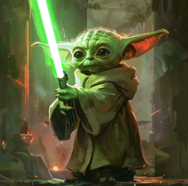

In [ ]:
import geopandas as gpd

In [ ]:
la_url="/content/drive/MyDrive/cb_2015/cb_2015_us_county_20m.shp"

In [ ]:
gdf=gpd.read_file(la_url)
louisiana_gdf = gdf[gdf['STATEFP'] == '22']

In [ ]:
df=df[(df.lat<34) & (df.lat>27) & (df.long<-88) & (df.long>-94)]
df.index=range(len(df))

In [ ]:
top=df.loc[:, ["region", "price", "lat", "long"]].groupby("region").mean().sort_values("price", ascending=False).head(10)
top

,price,lat,long
region,,,
central louisiana,1487.222222,30.761256,-92.142711
new orleans,1462.875380,30.019274,-90.113370
baton rouge,1324.938172,30.427682,-91.094769
lafayette,1237.406417,30.158587,-92.002412
shreveport,1230.866667,32.455347,-93.721420
lake charles,1206.257426,30.162578,-93.205331
houma,1205.020833,29.651194,-90.768558
monroe,1194.428571,32.556071,-92.094371


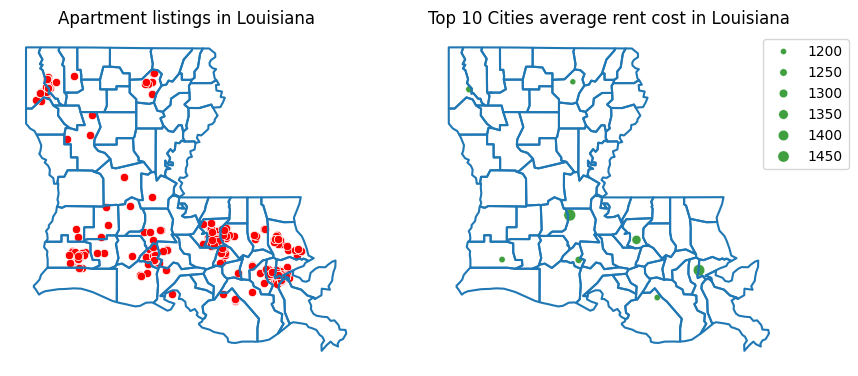

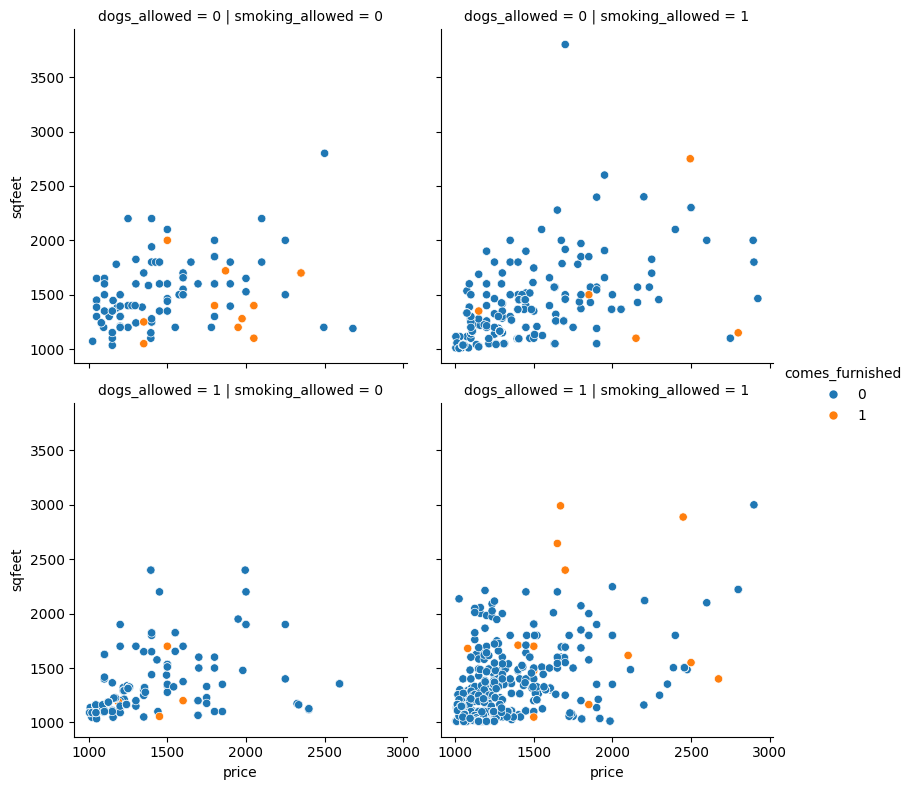

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=df, x="long", y="lat", color="Red", ax=axs[0])
louisiana_gdf.boundary.plot(ax=axs[0])
axs[0].axis('off')
#plt.grid()
axs[0].set_title("Apartment listings in Louisiana")
sns.scatterplot(data=top, x="long", y="lat", ax=axs[1], size="price",
                color="Green", alpha=0.75)
louisiana_gdf.boundary.plot(ax=axs[1])
axs[1].axis('off')
axs[1].set_title("Top 10 Cities average rent cost in Louisiana")
axs[1].legend(bbox_to_anchor=[1.2, 1])
sns.relplot(
    data=df, x="price", y="sqfeet", row="dogs_allowed",
    col="smoking_allowed", hue="comes_furnished",
    kind="scatter", height=4)
plt.show()

# Master Jedi

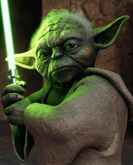

In [ ]:
df.description=df.description.apply(lambda x: x.lower())
word_list = [word for sentence in df.description.values for word in sentence.split()]
filtered_words = [word for word in word_list if word not in ["i", 'and', 'to', 'the', 'a', '-',
                                                             'in', 'with', 'of', 'our', 'for',
                                                            'you', 'contact', 'at', 'your', 'apartment', 'are', 'is', 'info',
                                                            'show', 'or', 'we', 'call', 'on', '&', 'apartments',
                                                            '2', 'pet', 'â\x80¢', '1', 'center', 'from', 'all', 'new', 'us',
                                                            'this', 'home', 'pool', '*', 'bedroom',
                                                            'as', 'today', 'have', 'by',
                                                            'one', 'swimming',
                                                            'that', 'available', 'an',
                                                            'free', 'more', 'tour', 'two', 'will', 'enjoy',
                                                            'walk-in', 'area', 'maintenance', 'tx',
                                                            'full', 'private', 'offer', 'homes', 'ceiling', 'be',
                                                            'property', 'wood', 'not', 'per', 'office', 'fans', 'just',
                                                            'month', 'rent', 'has', 'flooring']]
bow={}
for word in filtered_words:
    try:
      bow[word]+=1
    except:
      bow[word]=1

In [ ]:
bow_df=pd.DataFrame(columns=["Word", "Frq"])
bow_df.Word=bow.keys()
bow_df.Frq=bow.values()
bow_df.sort_values('Frq', ascending=False).head(50)

,Word,Frq
8,community,1098
364,fitness,755
193,access,676
62,features,675
71,washer,646
366,kitchen,645
753,floor,639
252,located,625
73,large,586
180,living,561


In [ ]:
bow_df.sort_values('Frq', ascending=False).head(50)

,Word,Frq
8,community,1098
364,fitness,755
193,access,676
62,features,675
71,washer,646
366,kitchen,645
753,floor,639
252,located,625
73,large,586
180,living,561


In [ ]:
bow_df.sort_values('Frq', ascending=False).head(50).index

Index([   8,  364,  193,   62,   71,  366,  753,  252,   73,  180,   19, 1252,
        294,  103,  173,  416,  108,  172,  170,  235,  797,  286,  246,  350,
        104,  181,  192,  802,   39,  160,  217,  276,  979,  264,  327,  358,
       1225,    7,  159,  383,  985,   91,   63, 1307,   95,   65,  583,  270,
         40,  175],
      dtype='int64')

In [ ]:
top_15=bow_df.sort_values('Frq', ascending=False).head(15).Word.values
top_15

array(['community', 'fitness', 'access', 'features', 'washer', 'kitchen',
       'floor', 'located', 'large', 'living', 'la', 'center,', 'please',
       'business', 'spacious'], dtype=object)

In [ ]:
def tagger(text):
  for word in top_15:
    if word in text:
      return word
  return ""

df["tag"]=df.description.apply(tagger)

<Axes: xlabel='price', ylabel='tag'>

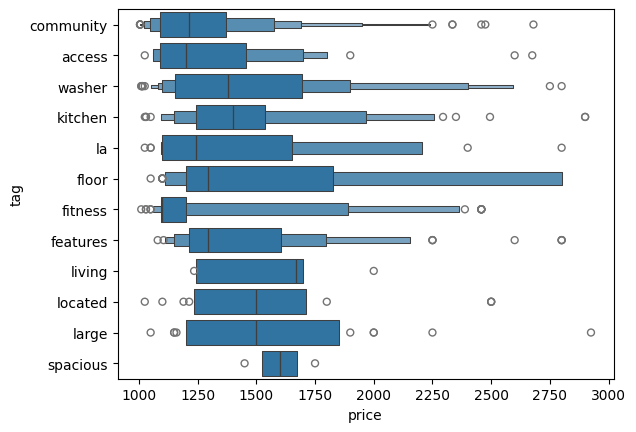

In [ ]:
sns.boxenplot(data=df[df.tag!=""], x="price", y="tag")

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

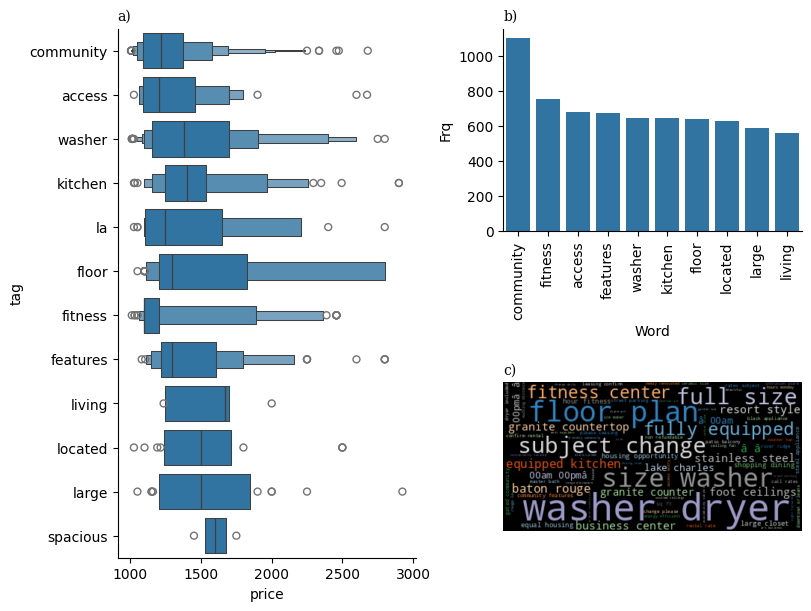

In [ ]:
fig, axs = plt.subplot_mosaic([['a)', 'b)'],
                               ['a)', 'c)']],
                              layout='constrained',
                              figsize=(8,6))

for label, ax in axs.items():
    ax.set_title(label, fontfamily='serif', loc='left', fontsize='medium')

sns.boxenplot(data=df[df.tag!=""], x="price", y="tag", ax=axs["a)"])
axs["a)"].spines[['right', 'top']].set_visible(False)

sns.barplot(data=bow_df.sort_values('Frq', ascending=False).head(10),
            x="Word", y="Frq", ax=axs["b)"])
axs["b)"].set_xticks(rotation=90, ticks=bow_df.sort_values('Frq', ascending=False).head(10).Word,
               labels=bow_df.sort_values('Frq', ascending=False).head(10).Word)
axs["b)"].spines[['right', 'top']].set_visible(False)

wordcloud = WordCloud(max_font_size=50, max_words=100, colormap='tab20c').generate(" ".join(filtered_words))
axs["c)"].imshow(wordcloud, interpolation="bilinear")
axs["c)"].axis("off")
plt.show()